In [1]:
import numpy as np
import os, sys, scipy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import scikits.bootstrap as bootstrap  
from scipy.stats.stats import spearmanr
import scipy.io as sio
from necessary_analysis_scripts import prettify_plot, calculate_aprime, load_data, run_stats_onetail, run_stats_twotail

# Plotting defaults 

In [2]:
#plot within jupyter notebooks
%matplotlib inline 

#tab completion for files
%config IPCompleter.greedy=True 

#supress scientific notation
np.set_printoptions(suppress=True) 

#font defaults
plt.rcParams.update({'font.size': 14})
rc('text', usetex=False)
plt.rcParams['pdf.fonttype'] = 42
if os.path.isfile("/Library/Fonts/HelveticaNeue-Light.ttf"): 
    prop = fm.FontProperties(fname="/Library/Fonts/HelveticaNeue-Light.ttf",size=24)
else:
    prop = fm.FontProperties(size=24)

#color defaults
col_corr = [0/255.,98/255.,100/255.]
col_incorr = [218/255.,66/255.,36/255.]

# Load data

In [3]:
#project directory
project_name = 'expt3b'

#load data 
subj_dat = load_data(project_name)

#basic project information
nsubj = len(subj_dat)
print("\nTotal # subjects:",nsubj)
if project_name== 'expt3a':
    nb = 4
elif project_name == 'expt3b':
    nb = 6
nt = 800
nprobes = 160
ninfreq = 320
ncolors = 9
setsize = 6


Total # subjects: 24


# Sustained attention performance

First, let's examine the performance in the sustained attention task

In this Sustained Attention to Response Task (or SART), participants respond to the shape of the items. However, 90% of the items are circles and 10% of the items are squares. These imbalances make participants much more likely to make errors to the infrequent trials

Sensitivity (A'):	 0.86 	95% CIs [0.84 0.88]
Accuracy:
Infrequent trials:	 0.51 	95% CIs [0.42 0.59]
Frequent trials:	 0.98 	95% CIs [0.97 0.99]
Parametric: ttest: t  11.14 p 4.84e-11
Nonparametric p < 0.001


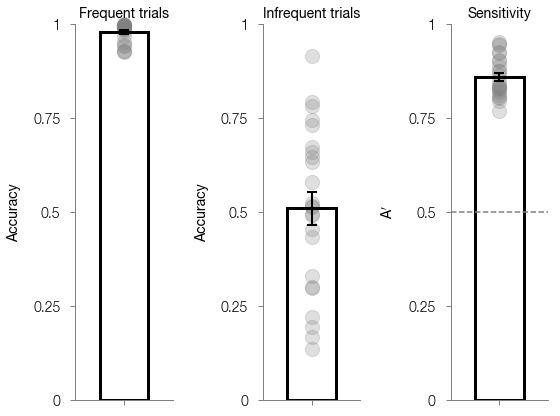

In [4]:
#calculate the accuracy in the sustained attention task
freq_acc, infreq_acc, aprime = np.zeros(nsubj), np.zeros(nsubj), np.zeros(nsubj)
for isubj in range(nsubj):
    acc = np.ravel(subj_dat[isubj].acc[:(nb*nt)]) #accuracy to all trials
    freq_trials = np.ravel(subj_dat[isubj].freq_trials[:(nb*nt)]) #locate frequent triaks
    freq_acc[isubj] = np.mean(acc[freq_trials==1]==1) #calculate average frequent trial accuracy
    infreq_acc[isubj] = np.mean(acc[freq_trials==0]==1) #calculate average infrequent trial accuracy
    aprime[isubj] = calculate_aprime(freq_acc[isubj],infreq_acc[isubj]) #sensitivity

#compute the 95% confidence intervals (CIs)
freq_acc_CIs = bootstrap.ci(data=(freq_acc), statfunction=scipy.mean,n_samples=10000)
infreq_acc_CIs = bootstrap.ci(data=(infreq_acc), statfunction=scipy.mean,n_samples=10000)
aprime_CIs = bootstrap.ci(data=(aprime), statfunction=scipy.mean,n_samples=10000)

#print the results (mean + CIs)
print("Sensitivity (A'):\t", np.round(np.mean(aprime),decimals=2), "\t95% CIs", np.round(aprime_CIs,decimals=2))
print("Accuracy:")
print("Infrequent trials:\t", np.round(np.mean(infreq_acc),decimals=2), "\t95% CIs", np.round(infreq_acc_CIs,decimals=2))
print("Frequent trials:\t", np.round(np.mean(freq_acc),decimals=2), "\t95% CIs", np.round(freq_acc_CIs,decimals=2))

#run statistics on accurac
run_stats_onetail(freq_acc,infreq_acc)

def scatter_plot_data(ax,data,x=0):
    n = np.size(data)
    ax.scatter(np.ones(n)+x,data,s=200,facecolor='gray',alpha=.25,clip_on=False)#data points
    ax.bar(1,np.mean(data),.25,color='None',edgecolor='k',linewidth=3)
    #ax.plot((.9+x,1.1+x),np.tile(np.mean(data),2),'k',linewidth=3)#mean
    ax.errorbar(1+x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar
    
#Plot sustained attention data
fig, ax = plt.subplots(1,3,figsize=(8,6))

#Left plot: frequent trial error rate
scatter_plot_data(ax[0],freq_acc) 
prettify_plot(ax[0],ylim=[0,1],yt=([0,.25,.5,.75,1]),ytl=([0,.25,.5,.75,1]),yl="Accuracy",ylrot=90,
              xlim=(.75,1.25), xt=([1]),xtl=([""]))
prettify_plot(ax[0],t='Frequent trials')

#Middle plot: infrequent trial error rate
scatter_plot_data(ax[1],infreq_acc)
prettify_plot(ax[1],ylim=[0,1],yt=([0,.25,.5,.75,1]),ytl=([0,.25,.5,.75,1]),yl="Accuracy",ylrot=90,
              xlim=(.75,1.25),xt=([1]),xtl=([""]),t='Infrequent trials')

#Right plot: sensitivity 
scatter_plot_data(ax[2],aprime)
ax[2].plot([.75,1.25],[.5,.5],'--',color='gray')
prettify_plot(ax[2],ylrot=90,xlim=(.75,1.25),ylim=[0,1],yt=([0,.25,.5,.75,1]),ytl=([0,.25,.5,.75,1]),yl="A$\'$",
                 xt=([1]),xtl=([""]),t='Sensitivity')

plt.show()

/Users/megan/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


RT incorr: 299 [283 317]
RT corr: 342 [325 365]
Parametric: ttest: t  8.48 p 7.85e-09
Nonparametric p < 0.001


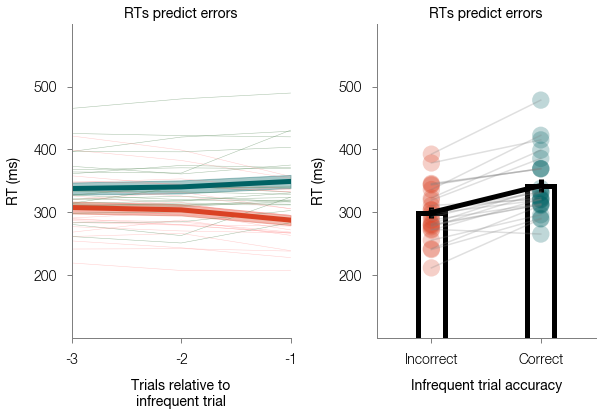

In [5]:
shifts = [-3,-2,-1] #trials pre-probe trial
nshifts = np.size(shifts)

rts_corr_m = np.zeros((nsubj,nshifts))
rts_incorr_m = np.zeros((nsubj,nshifts))
probe_inacc = np.zeros(nsubj)
wm_n_all = np.zeros((nsubj,nprobes))
wm_n_corr = np.empty(nsubj)
wm_n_incorr = np.empty(nsubj)
wm_n_diff = np.empty(nsubj)
nbins = 11
infreq_propacc_bin = np.empty((nsubj,nbins))
wm_n_bin = np.empty((nsubj,nbins))

for isubj in range(nsubj):
    
    #index relevant trial locations
    infreq_trials = np.where(subj_dat[isubj].freq_trials[:(nb*nt)]==0)[0]
    infreq_trial_acc = subj_dat[isubj].acc[infreq_trials]==1
    infreq_corr = np.where(subj_dat[isubj].acc[infreq_trials]==1)[0]
    infreq_incorr = np.where(subj_dat[isubj].acc[infreq_trials]!=1)[0]
    
    #reaction times
    rts = subj_dat[isubj].rts
    rts_shift = np.zeros((np.size(infreq_trials),nshifts)) #preallocate the shifted RTs
    rts_shift[:]= np.nan
    
    #shift rts relative to infrequent trial
    for i,ishift in enumerate(shifts):
         
        infreq_s = infreq_trials + ishift #infrequent trial indices, shifted back one 
        infreq_s = infreq_s[np.logical_and((infreq_s%nt)>=0,(infreq_s%nt)<nt)] #ensure doesn't span blocks
        
        #grab the RTs for the preceding trials
        rts_shift[np.logical_and((infreq_s%nt)>=0,(infreq_s%nt)<nt),i] = rts[infreq_s]
    
        rts_corr_m[isubj,i] = np.nanmean(rts_shift[infreq_corr,i]) #mean RT across trials pre and post correct response
        rts_incorr_m[isubj,i] = np.nanmean(rts_shift[infreq_incorr,i]) #mean RT across trials pre and post incorrect response
    
CIs = bootstrap.ci(data=(rts_incorr_m*1000), statfunction=scipy.mean,n_samples=10000)
print("RT incorr:", int(np.round(np.mean(rts_incorr_m*1000),decimals=0)), (np.round(CIs,decimals=0)).astype(int))
CIs = bootstrap.ci(data=(rts_corr_m*1000), statfunction=scipy.mean,n_samples=10000)
print("RT corr:", int(np.round(np.mean(rts_corr_m*1000),decimals=0)), (np.round(CIs,decimals=0)).astype(int))
run_stats_onetail(np.mean(rts_corr_m,axis=1)*1000,np.mean(rts_incorr_m,axis=1)*1000)

#MAKE FIGURE
fig = plt.figure(figsize=(12,6))

#plot sustained attention performance
ax = plt.subplot(132)
for isubj in range(nsubj):
    ax.plot(shifts,rts_corr_m[isubj]*1000,color=[.3,.5,.3],alpha=.5,linewidth=.5)#correct trials
    ax.plot(shifts,rts_incorr_m[isubj]*1000,color=[1,.6,.6],alpha=.5,linewidth=.5)#incorrect trials
    
#plot averages
ax.fill_between(shifts,np.mean(rts_corr_m*1000,axis=0)-np.std(rts_corr_m*1000,axis=0)/np.sqrt(nsubj),
                np.mean(rts_corr_m,axis=0)*1000+np.std(rts_corr_m*1000,axis=0)/np.sqrt(nsubj),
                alpha=.35,color=col_corr,edgecolor='None')#correct trials
ax.fill_between(shifts,np.mean(rts_incorr_m*1000,axis=0)-np.std(rts_incorr_m*1000,axis=0)/np.sqrt(nsubj),
                np.mean(rts_incorr_m,axis=0)*1000+np.std(rts_incorr_m*1000,axis=0)/np.sqrt(nsubj),
                alpha=.35,color=col_incorr,edgecolor='None')#incorrect trials
ax.plot(shifts,np.mean(rts_corr_m,axis=0)*1000,color=col_corr,linewidth=5)#incorrect trials
ax.plot(shifts,np.mean(rts_incorr_m,axis=0)*1000,color=col_incorr,linewidth=5)#incorrect trials
prettify_plot(ax,ylim=([100,600]),yt=([200,300,400,500]),ytl=([200,300,400,500]),yl='RT (ms)',ylrot=90,
              xlim=(-3,-1),xl='Trials relative to\ninfrequent trial', xt=([-3,-2,-1]),xtl=([-3,-2,-1]))
prettify_plot(ax,t='RTs predict errors')

#plot average pre-trial sustained attention performance
ax = plt.subplot(133)
ax.scatter(np.zeros(nsubj),np.mean(rts_incorr_m,axis=1)*1000,s=300,color=col_incorr,edgecolor='None',alpha=.25)#incorrect trials
ax.scatter(np.ones(nsubj),np.mean(rts_corr_m,axis=1)*1000,s=300,color=col_corr,edgecolor='None',alpha=.25)#correct trials
ax.plot([0,1],[np.mean(rts_incorr_m,axis=1)*1000,np.mean(rts_corr_m,axis=1)*1000],color='gray',alpha=.25)
ax.bar(0,np.mean(rts_incorr_m)*1000,.25,color='None',edgecolor='k',linewidth=5)#correct trials
ax.bar(1,np.mean(rts_corr_m)*1000,.25,color='None',edgecolor='k',linewidth=5)#incorrect trials
ax.errorbar(0,np.mean(rts_incorr_m)*1000,yerr=np.std(rts_incorr_m)*1000/np.sqrt(nsubj),color='k',linewidth=5)
ax.errorbar(1,np.mean(rts_corr_m)*1000,yerr=np.std(rts_corr_m)*1000/np.sqrt(nsubj),color='k',linewidth=5)
ax.plot([0,1],[np.mean(rts_incorr_m)*1000,np.mean(rts_corr_m)*1000],color='k',linewidth=5)#incorrect trials
prettify_plot(ax,ylim=([100,600]),yt=([200,300,400,500]),ytl=([200,300,400,500]),yl='RT (ms)',ylrot=90,
              xlim=(-.5,1.5),xt=([0,1]),xtl=(['Incorrect','Correct']),xl='Infrequent trial accuracy')
prettify_plot(ax,t='RTs predict errors')

plt.show()

# Working memory performance 

Now, let's examine the performance in the working memory portion of the task

In this continuous report working memory task, participants respond to the color of the items by clicking along a continuous wheel. These memory probes are rare, only occuring <=5% of the time.

Working memory performance:	 24.7 [20.55 30.49]


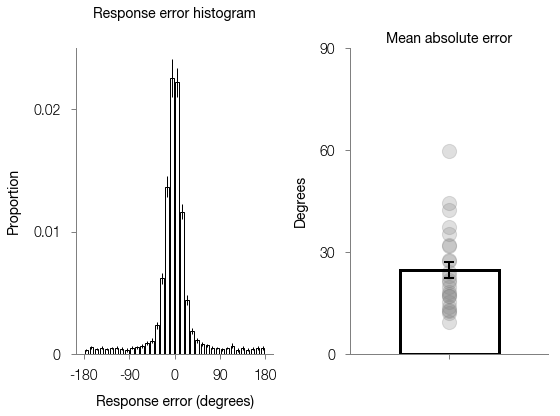

In [6]:
bin_width=10.
bins = np.arange(-180,180+bin_width,bin_width)
bin_height = np.empty((nsubj,np.size(bins)-1))
x = bins[:-1]+bin_width/2
wm_degdiff_m=np.zeros((nsubj))
wm_degdiff_min=np.zeros((nsubj))
wm_degdiff_max=np.zeros((nsubj))

#calculate working memory performance
for isubj in range(nsubj):
    iprobe = ~np.isnan(subj_dat[isubj].wm_respcolorminusorigcolor)
    bin_height[isubj],_ = np.histogram(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe],bins,density=True)
    wm_degdiff_m[isubj] = np.mean(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe]))
    wm_degdiff_min[isubj] = np.min(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe]))
    wm_degdiff_max[isubj] = np.max(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe]))
    
#Confidence intervals
wm_degdiff_CIs = bootstrap.ci(data=wm_degdiff_m, statfunction=scipy.mean) #confidence intervals
print("Working memory performance:\t", np.round(np.mean(wm_degdiff_m),decimals=2), np.round(wm_degdiff_CIs,decimals=2))

    
def scatter_plot_data(ax,data,x=0):
    n = np.size(data)
    ax.scatter(np.ones(n)+x,data,s=200,facecolor='gray',alpha=.25,clip_on=False)#data points
    ax.bar(1,np.mean(data),.25,color='None',edgecolor='k',linewidth=3)
    ax.errorbar(1+x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar
    
    
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax[0].bar(x,np.mean(bin_height,axis=0),bin_width-3,color='None',edgecolor='k',linewidth=1,align='center')
ax[0].errorbar(bins[:-1]+bin_width/2,np.mean(bin_height,axis=0),yerr=np.std(bin_height,axis=0)/np.sqrt(float(nsubj)),
    linestyle='None',color='k',linewidth=1,capsize=0,capthick=2)
prettify_plot(ax[0],ylrot=90,ylim=[0,.025],t='Response error histogram',
         yt=([0,.01,.02,.03]),ytl=([0,.01,.02,.03]),yl="Proportion",
         xt=[-180,-90,0,90,180],xtl=[-180,-90,0,90,180],xl='Response error (degrees)')

scatter_plot_data(ax[1],wm_degdiff_m) 
prettify_plot(ax[1],ylim=[0,90],yt=([0,30,60,90]),ytl=([0,30,60,90]),yl="Degrees",ylrot=90,
              xlim=(.75,1.25), xt=([1]),xtl=([""]),t='Mean absolute error')

plt.show()

# Attention/memory relationship across individuals

Next, let's examine whether the performance of the attention and memory tasks is related across individuals. The critical measure of attention performance that we used is their average accuracy to the infrequent trials. We compare performance in 3 ways: 
1. Median split participants based on their attention performance, examine the mean absolute response error of each group
2. Median split participants based on their attention performance, examine the distributions of response error of each group 
3. Correlate the attention performance of each individual with their mean absolute response error

(24,) (24,)
-0.577391304347826 0.0031332357033776004


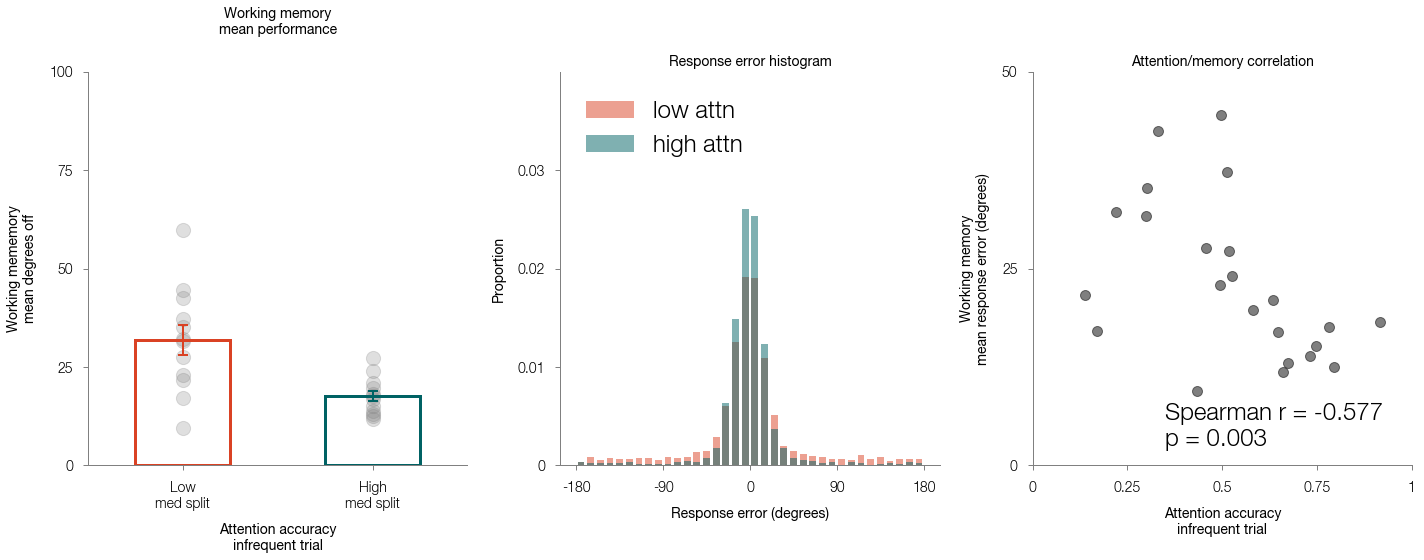

In [7]:
#first, median split the subjects based on sustained attention performance
subj_lowattn = np.where(infreq_acc<=np.median(infreq_acc))[0] #indices of lower performing subjects
subj_highattn = np.where(infreq_acc>np.median(infreq_acc))[0] #indices of higher performing subjects

#correlation
print(np.shape(infreq_acc),np.shape(wm_degdiff_m))
r,p_corr = spearmanr(infreq_acc,wm_degdiff_m)
print(r,p_corr)

#median split performance
def scatter_plot_data(ax,data,x=0,c='k'):
    n = np.size(data)
    ax.scatter(np.ones(n)+x,data,s=200,facecolor='gray',alpha=.25,clip_on=False)#data points
    ax.bar(1+x,np.mean(data),.5,color='None',edgecolor=c,linewidth=3)#mean
    ax.errorbar(1+x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color=c,linewidth=2,capsize=5,capthick=2)#error bar
    
#make figure 
fig, ax = plt.subplots(1,3,figsize=(20,8))
scatter_plot_data(ax[0],wm_degdiff_m[subj_lowattn],c=col_incorr)
scatter_plot_data(ax[0],wm_degdiff_m[subj_highattn],x=1,c=col_corr)
prettify_plot(ax[0],ylim=[0,100], yt=([0,25,50,75,100]),ytl=([0,25,50,75,100]),yl='Working mememory\nmean degrees off',ylrot=90,
              xlim=(.5,2.5),xt=([1,2]),xtl=(["Low\nmed split","High\nmed split"]),
              xl='Attention accuracy\ninfrequent trial',
              t='Working memory\nmean performance')

##working memory mean performance, median split median split groups
ax[1].bar(x,np.mean(bin_height[subj_lowattn],axis=0),bin_width-3,facecolor=col_incorr,alpha=.5,label='low attn')
ax[1].bar(x,np.mean(bin_height[subj_highattn],axis=0),bin_width-3,facecolor=col_corr,alpha=.5,label='high attn')    
ax[1].legend(frameon=False,prop=prop,loc='upper left',bbox_to_anchor=(0.01, .98))
prettify_plot(ax[1],ylrot=90,ylim=[0,.04],t='Response error histogram',
         yt=([0,.01,.02,.03]),ytl=([0,.01,.02,.03]),yl="Proportion",
         xt=[-180,-90,0,90,180],xtl=[-180,-90,0,90,180],xl='Response error (degrees)')

#attention/memory correlation
ax[2].scatter(infreq_acc,wm_degdiff_m,100,'k',alpha=.5)
prettify_plot(ax[2],ylim=[0,50],yt=([0,25,50,75,100]),ytl=([0,25,50,75,100]),yl="Working memory\nmean response error (degrees)",ylrot=90,
              xlim=(0,1),xt=([0,.25,.5,.75,1]),xtl=([0,.25,.5,.75,1]),xl='Attention accuracy\ninfrequent trial',
              t='Attention/memory correlation')
ax[2].text(.35,2.5,'Spearman r = ' + str(np.round(r,decimals=3)) + '\np = ' + str(np.round(p_corr,decimals=3)) ,fontsize=24,horizontalalignment='left',fontproperties=prop)

plt.show()


# Consequences of real-time triggering for response error

Lastly, let's examine the memory consequences of the real-time triggering procedure. 

In Experiment 3, memory probes were triggered based on the RTs. If participants were responding more quickly, we triggered a "fast memory probe", and if participants were responding more quickly, we triggered a "slow memory probe". Unlike Experiment 2, we did not predict that the attentional state that triggered memory probes would impact performance. 

Here, we examine response error. In Experiment 2, the obersvation was that faster responses led to worse memory (i.e., fewer items remembered). In the continuous performance task, worse memory was operationalized as higher absolute response error. Consistent with our hypothesis, we did not observe that faster responses impacted 


RT fast: 217 [192 241]
RT slow: 448 [426 477]
Parametric: ttest: t  16.09 p 2.62e-14
Nonparametric p < 0.001
RT slow min fast: 231 [207 263]

WM err fast: 24.57 [20.4  30.07]
WM err slow: 25.19 [20.69 32.54]
Parametric: ttest: t  -0.42 p 3.40e-01
Nonparametric p: = 0.657
WM err slow min fast: 0.63 [-1.89  3.95]


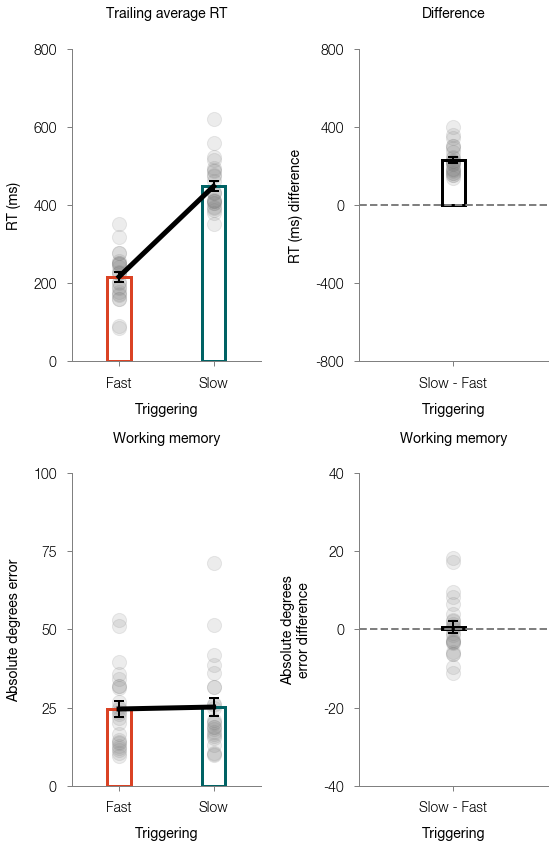

In [8]:
shifts = [-3,-2,-1] #trials pre-probe trial
nshifts = np.size(shifts)

rt_fast = np.empty(nsubj)
rt_slow = np.empty(nsubj)
m_fast = np.empty(nsubj)
m_slow = np.empty(nsubj)

for isubj in range(nsubj):
    fast_rt_trigger = np.where(subj_dat[isubj].fast_rt_trigger==1)[0]
    slow_rt_trigger = np.where(subj_dat[isubj].slow_rt_trigger==1)[0]
    
    rt_fast[isubj] = np.mean(subj_dat[isubj].rts_trailingavg[fast_rt_trigger])*1000
    rt_slow[isubj] =  np.mean(subj_dat[isubj].rts_trailingavg[slow_rt_trigger])*1000
    
    m_fast[isubj] = np.nanmean(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[fast_rt_trigger+1]))
    m_slow[isubj] =  np.nanmean(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[slow_rt_trigger+1]))
    

def scatter_plot_data(ax,data,x=0,c='k'):
    n = np.size(data)
    ax.scatter(np.zeros(n)+x,data,s=200,facecolor='gray',alpha=.15,clip_on=False)#data points
    ax.bar(x,np.mean(data),.25,color='None',edgecolor=c,linewidth=3)
    ax.errorbar(x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar


CIs = bootstrap.ci(data=(rt_fast), statfunction=scipy.mean,n_samples=10000)
print("\nRT fast:", int(np.round(np.mean(rt_fast),decimals=0)), np.round(CIs,decimals=0).astype(int))
CIs = bootstrap.ci(data=(rt_slow), statfunction=scipy.mean,n_samples=10000)
print("RT slow:", int(np.round(np.mean(rt_slow),decimals=0)),np.round(CIs,decimals=0).astype(int))
run_stats_onetail(rt_slow,rt_fast)
CIs = bootstrap.ci(data=(rt_slow-rt_fast), statfunction=scipy.mean,n_samples=10000)
print("RT slow min fast:", int(np.round(np.mean(rt_slow-rt_fast),decimals=0)),np.round(CIs,decimals=0).astype(int))

CIs = bootstrap.ci(data=(m_fast), statfunction=scipy.mean,n_samples=10000)
print("\nWM err fast:", np.round(np.mean(m_fast),decimals=2), np.round(CIs,decimals=2))
CIs = bootstrap.ci(data=(m_slow), statfunction=scipy.mean,n_samples=10000)
print("WM err slow:", np.round(np.mean(m_slow),decimals=2),np.round(CIs,decimals=2))
run_stats_onetail(m_fast,m_slow)
CIs = bootstrap.ci(data=(m_slow-m_fast), statfunction=scipy.mean,n_samples=10000)
print("WM err slow min fast:", np.round(np.mean(m_slow-m_fast),decimals=2),np.round(CIs,decimals=2))

def scatter_plot_data(ax,data,x=0,c='k'):
    n = np.size(data)
    ax.scatter(np.zeros(n)+x,data,s=200,facecolor='gray',alpha=.15,clip_on=False)#data points
    ax.bar(x,np.mean(data),.25,color='None',edgecolor=c,linewidth=3)
    ax.errorbar(x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar

#MAKE FIGURE
fig = plt.figure(figsize=(8,12))

ax = plt.subplot(221)
scatter_plot_data(ax,rt_fast,c=col_incorr)
scatter_plot_data(ax,rt_slow,x=1,c=col_corr)
ax.plot([0,1],[np.mean(rt_fast),np.mean(rt_slow)],color='k',linewidth=5)
prettify_plot(ax,ylim=([0,800]),yt=([0,200,400,600,800]),ytl=([0,200,400,600,800]),yl='RT (ms)',ylrot=90,
              xlim=(-.5,1.5),xt=([0,1]),xtl=(['Fast','Slow']),xl='Triggering', 
              t='Trailing average RT')

ax = plt.subplot(222)
scatter_plot_data(ax,rt_slow-rt_fast)
ax.plot([-2,2],[0,0],'--',color='gray',linewidth=2)
prettify_plot(ax,ylim=([-800,800]),yt=([-800,-400,0,400,800]),ytl=([-800,-400,0,400,800]),yl='RT (ms) difference',ylrot=90,
              xlim=(-1,1),xt=([0]),xtl=(['Slow - Fast']),xl='Triggering', 
              t='Difference')

ax = plt.subplot(223)
scatter_plot_data(ax,m_fast,c=col_incorr)
scatter_plot_data(ax,m_slow,x=1,c=col_corr)
ax.plot([0,1],[np.mean(m_fast),np.mean(m_slow)],color='k',linewidth=5)
prettify_plot(ax,ylim=([0,100]), yt=([0,25,50,75,100]),ytl=([0,25,50,75,100]),yl='Absolute degrees error',ylrot=90,
              xlim=(-.5,1.5), xt=([0,1]),xtl=(['Fast','Slow']),xl='Triggering',
              t='Working memory')

ax = plt.subplot(224)
scatter_plot_data(ax,m_slow-m_fast)
ax.plot([-2,2],[0,0],'--',color='gray',linewidth=2)
prettify_plot(ax,ylim=([-40,40]), yt=([-40,-20,0,20,40]),ytl=([-40,-20,0,20,40]),yl='Absolute degrees\nerror difference',ylrot=90,
              xlim=(-1,1), xt=([0]),xtl=(['Slow - Fast']),xl='Triggering',
              t='Working memory')

plt.show()

# Mixture modeling

These data can also be analyzed using mixture models, which analyze continuous report data as a von Mises + a uniform. These results were obtained using the MemToolbox in MatLab (Suchow et al 2013), the code is included as ``` expt3_mixmodel.m```

The results are loaded here for analysis and plotting. Similar to the predictions for response error, we did not think that the attentional state that triggered the memory probe would impact guessing rates (g) or precision (sd). 

In [9]:
mat_contents = sio.loadmat('../' + project_name +'/results/mixturemodel.mat',struct_as_record=False)
mixmodel_model_fit = mat_contents['mixmodel'][0][0].model_fit
mixmodel_fast_model_fit = mat_contents['mixmodel_fast'][0][0].model_fit
mixmodel_slow_model_fit = mat_contents['mixmodel_slow'][0][0].model_fit

#Print means and 95% confidence intervals
g = mixmodel_model_fit[:,0]*100
sd = mixmodel_model_fit[:,1]
CIs = bootstrap.ci(data=(g), statfunction=scipy.mean,n_samples=10000)
print("Guessing:", np.round(np.mean(g),decimals=2), np.round(CIs,decimals=2))
CIs = bootstrap.ci(data=(sd), statfunction=scipy.mean,n_samples=10000)
print("Precision sd:", np.round(np.mean(sd),decimals=2), np.round(CIs,decimals=2))

g_fast = mixmodel_fast_model_fit[:,0]*100
g_slow = mixmodel_slow_model_fit[:,0]*100
CIs = bootstrap.ci(data=(g_fast), statfunction=scipy.mean,n_samples=10000)
print("Guessing fast:", np.round(np.mean(g_fast),decimals=2), np.round(CIs,decimals=2))
CIs = bootstrap.ci(data=(g_slow), statfunction=scipy.mean,n_samples=10000)
print("Guessing slow:", np.round(np.mean(g_slow),decimals=2), np.round(CIs,decimals=2))
run_stats_onetail(g_fast,g_slow)
CIs = bootstrap.ci(data=(g_slow-g_fast), statfunction=scipy.mean,n_samples=10000)
print("Guessing slow min fast:", np.round(np.mean(g_slow-g_fast),decimals=2), np.round(CIs,decimals=2))

sd_fast = mixmodel_fast_model_fit[:,1]
sd_slow = mixmodel_slow_model_fit[:,1]
CIs = bootstrap.ci(data=(sd_fast), statfunction=scipy.mean,n_samples=10000)
print("Precision sd fast:", np.round(np.mean(sd_fast),decimals=2), np.round(CIs,decimals=2))
CIs = bootstrap.ci(data=(sd_slow), statfunction=scipy.mean,n_samples=10000)
print("Precision sd slow:", np.round(np.mean(sd_slow),decimals=2), np.round(CIs,decimals=2))
run_stats_onetail(sd_fast,sd_slow)
CIs = bootstrap.ci(data=(sd_slow-sd_fast), statfunction=scipy.mean,n_samples=10000)
print("Precision sd slow min fast:", np.round(np.mean(sd_slow-sd_fast),decimals=2), np.round(CIs,decimals=2))

Guessing: 17.92 [13.18 24.46]
Precision sd: 15.46 [14.27 17.34]
Guessing fast: 17.43 [13.   23.88]
Guessing slow: 17.71 [12.41 25.25]
Parametric: ttest: t  -0.14 p 4.45e-01
Nonparametric p: = 0.549
Guessing slow min fast: 0.28 [-3.26  4.61]
Precision sd fast: 15.85 [14.26 18.08]
Precision sd slow: 16.79 [14.72 22.2 ]
Parametric: ttest: t  -0.76 p 2.26e-01
Nonparametric p: = 0.777
Precision sd slow min fast: 0.94 [-0.89  4.07]


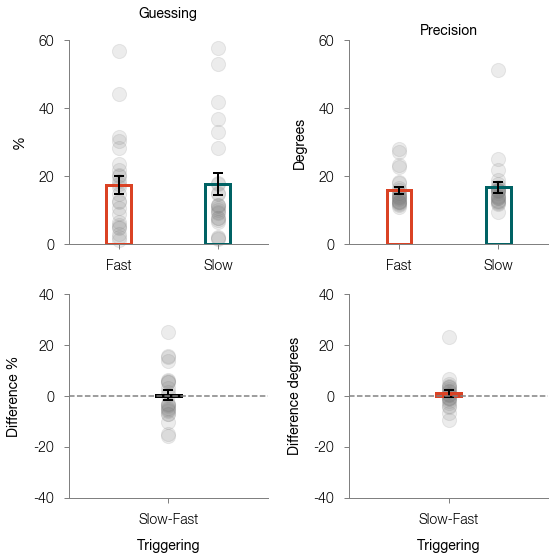

In [10]:
def scatter_plot_data(ax,data,x=0,c='k'):
    n = np.size(data)
    ax.scatter(np.zeros(n)+x,data,s=200,facecolor='gray',alpha=.15,clip_on=False)#data points
    ax.bar(x,np.mean(data),.25,color='None',edgecolor=c,linewidth=3)
    ax.errorbar(x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar



fig,ax = plt.subplots(2,2,figsize=(8,8))

scatter_plot_data(ax[0,0],mixmodel_fast_model_fit[:,0]*100,c=col_incorr)
scatter_plot_data(ax[0,0],mixmodel_slow_model_fit[:,0]*100,x=1,c=col_corr)
prettify_plot(ax[0,0],ylim=[0,60],yt=([0,20,40,60]),ytl=([0,20,40,60]),yl="%",ylrot=90,
              xlim=(-.5,1.5), xt=([0,1]),xtl=(['Fast','Slow']),
              t='Guessing')

scatter_plot_data(ax[1,0],mixmodel_slow_model_fit[:,0]*100-mixmodel_fast_model_fit[:,0]*100)
ax[1,0].plot([-1,1],[0,0],'--',color='gray')
prettify_plot(ax[1,0],ylim=[-40,40], yt=([-40,-20,0,20,40]),ytl=([-40,-20,0,20,40]),yl="Difference %",ylrot=90,
              xlim=(-1,1),xt=([0]),xtl=(['Slow-Fast']),xl='Triggering')

scatter_plot_data(ax[0,1],mixmodel_fast_model_fit[:,1],c=col_incorr)
scatter_plot_data(ax[0,1],mixmodel_slow_model_fit[:,1],x=1,c=col_corr)
prettify_plot(ax[0,1],ylim=[0,60],yt=([0,20,40,60]),ytl=([0,20,40,60]),yl="Degrees",ylrot=90,
              xlim=(-.5,1.5), xt=([0,1]),xtl=(['Fast','Slow']),
              t='Precision')

scatter_plot_data(ax[1,1],mixmodel_slow_model_fit[:,1]-mixmodel_fast_model_fit[:,1],c=col_incorr)
ax[1,1].plot([-1,1],[0,0],'--',color='gray')
prettify_plot(ax[1,1],ylim=[-40,40],yt=([-40,-20,0,20,40]),ytl=([-40,-20,0,20,40]),yl="Difference degrees",ylrot=90,
              xlim=(-1,1), xt=([0]),xtl=(['Slow-Fast']),xl='Triggering')



In [11]:
print("guessing correlation")
r,p =spearmanr(infreq_acc,mixmodel_model_fit[:,0]*100)
print(r,p)

print("precision correlation")
r,p = spearmanr(infreq_acc,mixmodel_model_fit[:,1])
print(r,p)

guessing correlation
-0.6 0.0019393928765259116
precision correlation
-0.4730434782608695 0.01956574865505622
